# Proyek Analisis Data: sellers_dataset.csv
*   Nama: Akas Bagus Setiawan
*   Email: akas.setiawan@gmail.com
*   ID Dicoding: l004ywd013






# Menentukan Pertanyaan Bisnis
*   Bagaimana distribusi geografis seller berdasarkan kota dan negara bagian, dan bagaimana pola ini dapat digunakan untuk mengoptimalkan strategi pemasaran?
*   Apakah ada konsentrasi seller yang lebih tinggi di kota atau negara bagian tertentu, dan bagaimana informasi ini dapat digunakan untuk memperluas jaringan seller?



# Import Semua Package/Library yang diperlukan

In [2]:
!pip install streamlit
!pip install cloudflared
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import streamlit as st

# Data Wrangling

1. Gathering

In [3]:
# Path ke dataset di Windows (gunakan format raw string r"..." untuk menghindari masalah dengan backslash)
file_path = "Data\sellers_dataset.csv"

# Load dataset
df = pd.read_csv(file_path)

# Tampilkan 5 baris pertama
df.head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


2. Assessing

In [4]:
# Data Assessing
print("=== INFORMASI DATASET ===")
df.info()

print("\n=== MISSING VALUES ===")
print(df.isnull().sum())

print("\n=== DUPLIKAT DATA ===")
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

print("\n=== STATISTIK DESKRIPTIF ===")
print(df.describe(include="all"))

=== INFORMASI DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

=== MISSING VALUES ===
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

=== DUPLIKAT DATA ===
Jumlah data duplikat: 0

=== STATISTIK DESKRIPTIF ===
                               seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     3442f8959a84dea7ee197c632cb2df1

3. Cleaning

In [5]:
# Menghapus duplikat data jika ada
df.drop_duplicates(inplace=True)

# Mengisi missing values jika ada
df.fillna(method='ffill', inplace=True)

# Cek ulang setelah preprocessing
print("\n=== CEK ULANG SETELAH PREPROCESSING ===")
print(df.isnull().sum())
print(f"Jumlah data duplikat setelah penghapusan: {df.duplicated().sum()}")


=== CEK ULANG SETELAH PREPROCESSING ===
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
Jumlah data duplikat setelah penghapusan: 0


C:\Users\WAWAN\AppData\Local\Temp\ipykernel_2320\2956472642.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# Exploratory Data Analysis (EDA)


--- 5 Data Teratas ---
                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP  

--- Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-nu

C:\Users\WAWAN\AppData\Local\Temp\ipykernel_2320\1243556302.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seller_per_city.head(10), x='jumlah_seller', y='seller_city', palette="Blues_r")


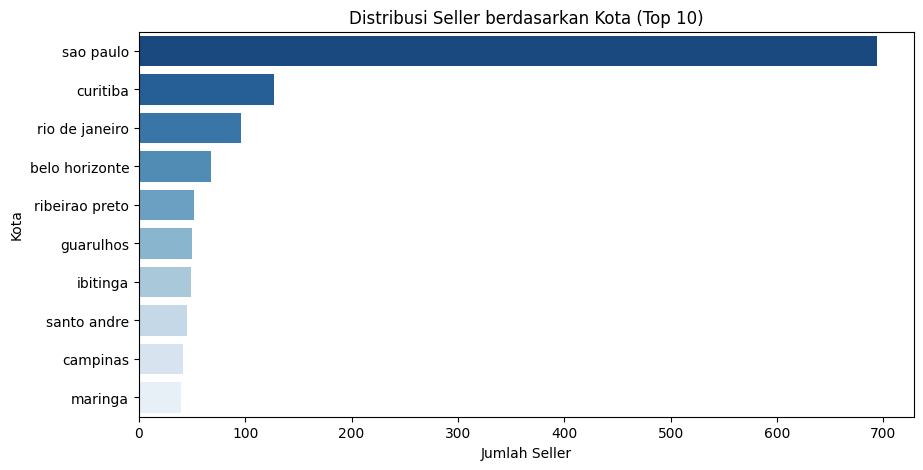

C:\Users\WAWAN\AppData\Local\Temp\ipykernel_2320\1243556302.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seller_per_state, x='seller_state', y='jumlah_seller', palette="coolwarm")


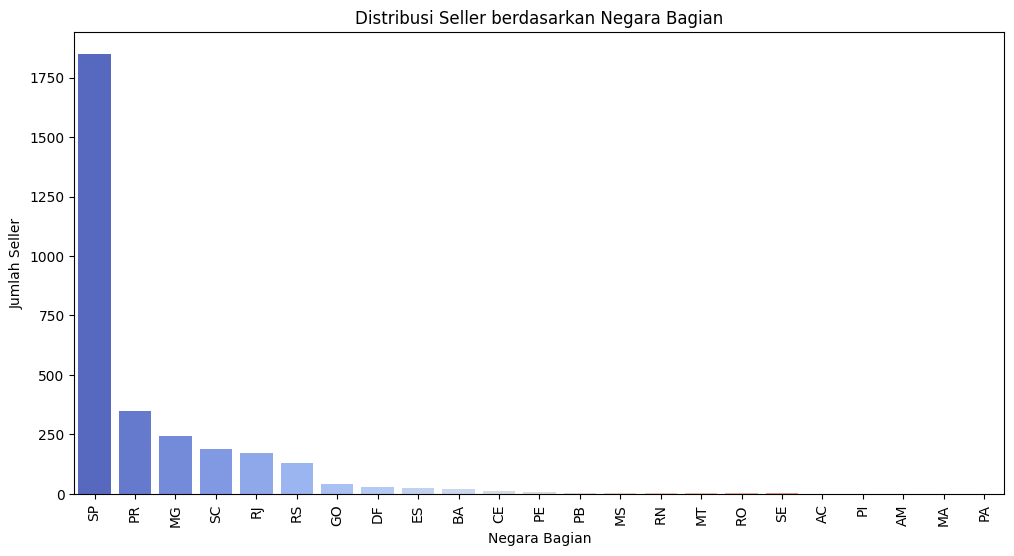

C:\Users\WAWAN\AppData\Local\Temp\ipykernel_2320\1243556302.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zip_counts.values, y=zip_counts.index, palette="Greens_r")


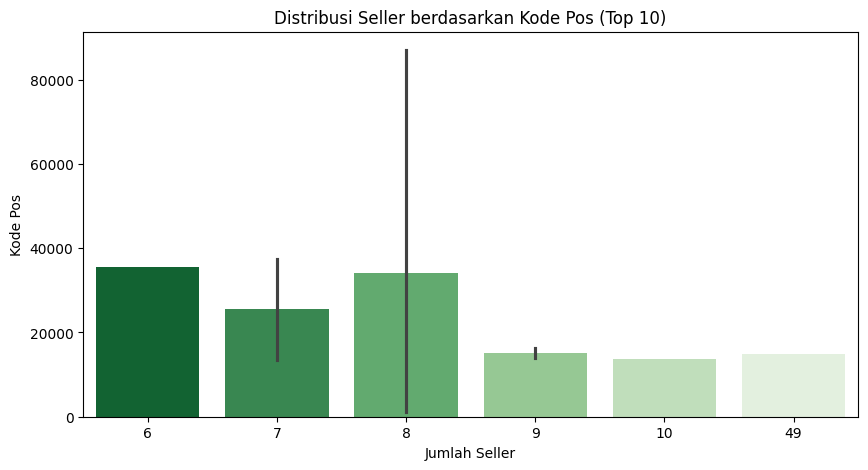

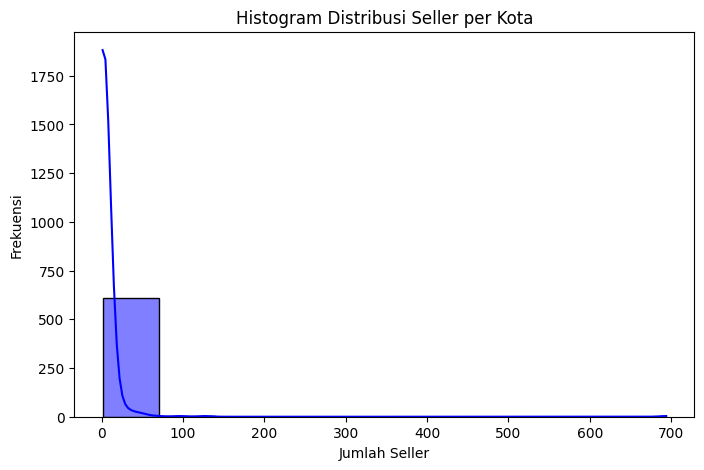

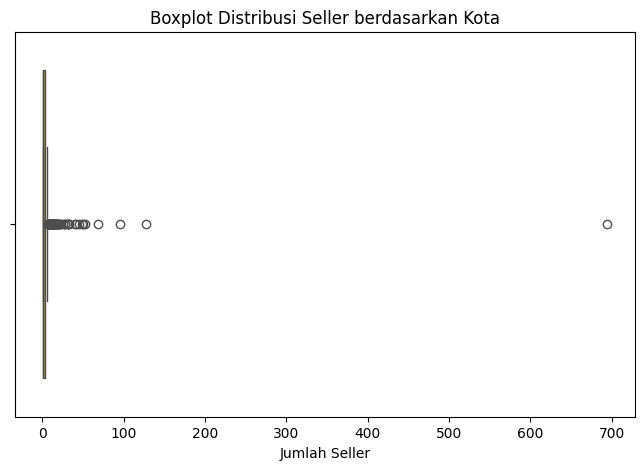

In [6]:
# Import library tambahan untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan 5 data teratas
print("\n--- 5 Data Teratas ---")
print(df.head())

# Informasi dataset
print("\n--- Informasi Dataset ---")
df.info()

# Menampilkan statistik deskriptif dari dataset
print("\n--- Statistik Deskriptif ---")
print(df.describe(include="all"))

# Mengecek jumlah data unik dalam setiap kolom
print("\n--- Jumlah Data Unik ---")
print(df.nunique())

### === AGREGASI DATA === ###
# Jumlah seller per kota
seller_per_city = df.groupby('seller_city').size().reset_index(name='jumlah_seller').sort_values(by='jumlah_seller', ascending=False)

# Jumlah seller per negara bagian
seller_per_state = df.groupby('seller_state').size().reset_index(name='jumlah_seller').sort_values(by='jumlah_seller', ascending=False)

# Jumlah rata-rata seller per kode pos (jika ada variabel numerik terkait)
if 'seller_zip_code_prefix' in df.columns:
    seller_per_zip = df.groupby('seller_zip_code_prefix').size().reset_index(name='jumlah_seller').sort_values(by='jumlah_seller', ascending=False)

# Menampilkan hasil agregasi
print("\n--- Jumlah Seller per Kota (Top 10) ---")
print(seller_per_city.head(10))

print("\n--- Jumlah Seller per Negara Bagian (Top 10) ---")
print(seller_per_state.head(10))

# Visualisasi distribusi seller berdasarkan kota (Top 10)
plt.figure(figsize=(10, 5))
sns.barplot(data=seller_per_city.head(10), x='jumlah_seller', y='seller_city', palette="Blues_r")
plt.xlabel("Jumlah Seller")
plt.ylabel("Kota")
plt.title("Distribusi Seller berdasarkan Kota (Top 10)")
plt.show()

# Visualisasi distribusi seller berdasarkan negara bagian
plt.figure(figsize=(12, 6))
sns.barplot(data=seller_per_state, x='seller_state', y='jumlah_seller', palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Negara Bagian")
plt.ylabel("Jumlah Seller")
plt.title("Distribusi Seller berdasarkan Negara Bagian")
plt.show()

# Distribusi Seller berdasarkan Kode Pos (Top 10)
zip_counts = df['seller_zip_code_prefix'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=zip_counts.values, y=zip_counts.index, palette="Greens_r")
plt.xlabel("Jumlah Seller")
plt.ylabel("Kode Pos")
plt.title("Distribusi Seller berdasarkan Kode Pos (Top 10)")
plt.show()

# Analisis distribusi seller berdasarkan jumlah seller per kota (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(seller_per_city['jumlah_seller'], bins=10, kde=True, color="blue")
plt.xlabel("Jumlah Seller")
plt.ylabel("Frekuensi")
plt.title("Histogram Distribusi Seller per Kota")
plt.show()

# Boxplot untuk melihat distribusi seller berdasarkan jumlah seller per kota
plt.figure(figsize=(8, 5))
sns.boxplot(x=seller_per_city['jumlah_seller'], color="orange")
plt.xlabel("Jumlah Seller")
plt.title("Boxplot Distribusi Seller berdasarkan Kota")
plt.show()


# Visualization & Explanatory Analysis

1.   Bagaimana distribusi geografis seller berdasarkan kota dan negara bagian, dan bagaimana pola ini dapat digunakan untuk mengoptimalkan strategi pemasaran?




--- Analisis Distribusi Geografis Seller ---
Kami menganalisis distribusi seller berdasarkan kota dan negara bagian untuk mengoptimalkan strategi pemasaran.

--- Jumlah Seller per Negara Bagian ---


C:\Users\WAWAN\AppData\Local\Temp\ipykernel_2320\1906627055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seller_per_state, x="seller_state", y="seller_id", palette="viridis")


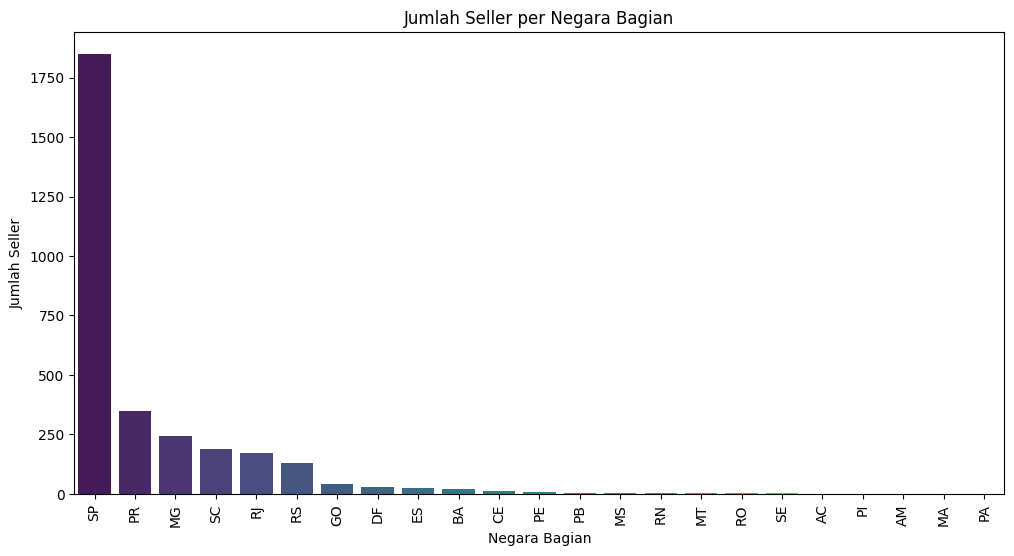


--- Rata-rata Seller per Kota dalam Negara Bagian ---


C:\Users\WAWAN\AppData\Local\Temp\ipykernel_2320\1906627055.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seller_avg_city, x="seller_state", y="avg_seller_per_city", palette="coolwarm")


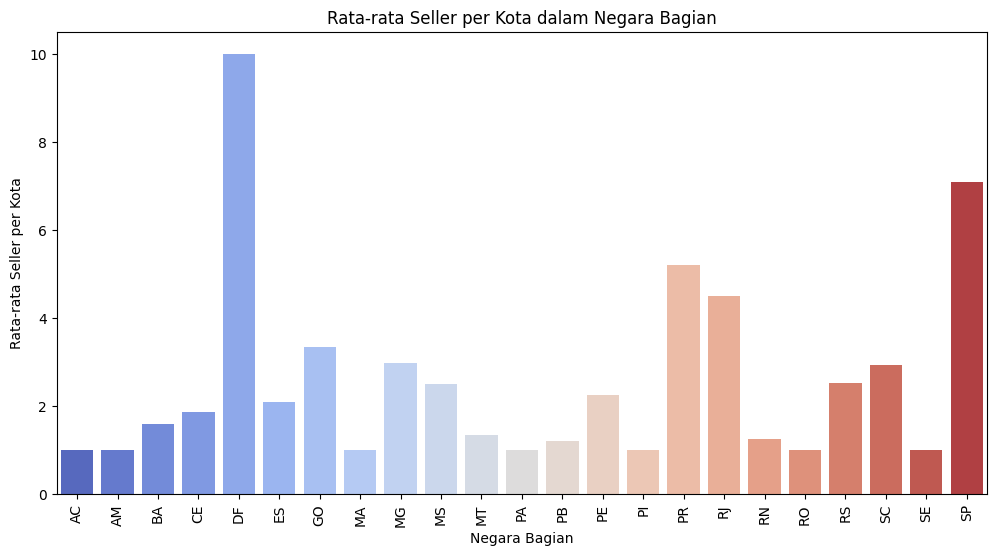

Dari grafik visualisasi yang ditampilkan terlihat sebaran seller pada setiap negara bagian dimana sao paulo adalah yang tertinggi (Jawaban Pertanyaan No 1), sehingga bisa didistribusika seller yang menumpuk mungkin dengan didukung data jumlah penduduk atau konsumen di setiap negara bagian maka pembagian seller akan lebih tepat


In [7]:
print("\n--- Analisis Distribusi Geografis Seller ---")
print("Kami menganalisis distribusi seller berdasarkan kota dan negara bagian untuk mengoptimalkan strategi pemasaran.")
# --- 1. Jumlah Seller per Negara Bagian ---
print("\n--- Jumlah Seller per Negara Bagian ---")
seller_per_state = df.groupby("seller_state")["seller_id"].nunique().reset_index()
seller_per_state = seller_per_state.sort_values(by="seller_id", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=seller_per_state, x="seller_state", y="seller_id", palette="viridis")
plt.xlabel("Negara Bagian")
plt.ylabel("Jumlah Seller")
plt.title("Jumlah Seller per Negara Bagian")
plt.xticks(rotation=90)
plt.show()


# --- 2. Rata-rata Seller per Kota dalam Negara Bagian ---
print("\n--- Rata-rata Seller per Kota dalam Negara Bagian ---")
seller_avg_city = df.groupby(["seller_state", "seller_city"])["seller_id"].nunique().groupby("seller_state").mean().reset_index()
seller_avg_city.rename(columns={"seller_id": "avg_seller_per_city"}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=seller_avg_city, x="seller_state", y="avg_seller_per_city", palette="coolwarm")
plt.xlabel("Negara Bagian")
plt.ylabel("Rata-rata Seller per Kota")
plt.title("Rata-rata Seller per Kota dalam Negara Bagian")
plt.xticks(rotation=90)
plt.show()
0
print("Dari grafik visualisasi yang ditampilkan terlihat sebaran seller pada setiap negara bagian dimana sao paulo adalah yang tertinggi (Jawaban Pertanyaan No 1), sehingga bisa didistribusika seller yang menumpuk mungkin dengan didukung data jumlah penduduk atau konsumen di setiap negara bagian maka pembagian seller akan lebih tepat")


2.   Apakah ada konsentrasi seller yang lebih tinggi di kota atau negara bagian tertentu, dan bagaimana informasi ini dapat digunakan untuk memperluas jaringan seller?



--- Analisis Konsentrasi Seller di kota atau negara bagian tertentu ---

--- Seller Terbanyak dan Paling Sedikit per Negara Bagian ---
Kota dengan jumlah seller terbanyak per negara bagian:
    seller_state              seller_city  seller_id
0             AC               rio branco          1
1             AM                   manaus          1
13            BA                 salvador          7
16            CE                fortaleza          7
21            DF                 brasilia         28
25            ES  cachoeiro de itapemirim          4
39            GO                  goiania         23
47            MA                 sao luis          1
57            MG           belo horizonte         66
130           MS             campo grande          4
132           MT                   cuiaba          2
135           PA  marechal candido rondon          1
137           PB              joao pessoa          2
143           PE                   recife          5
145           

C:\Users\WAWAN\AppData\Local\Temp\ipykernel_2320\3243924116.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seller_per_zip, x="seller_zip_code_prefix", y="seller_id", palette="magma")


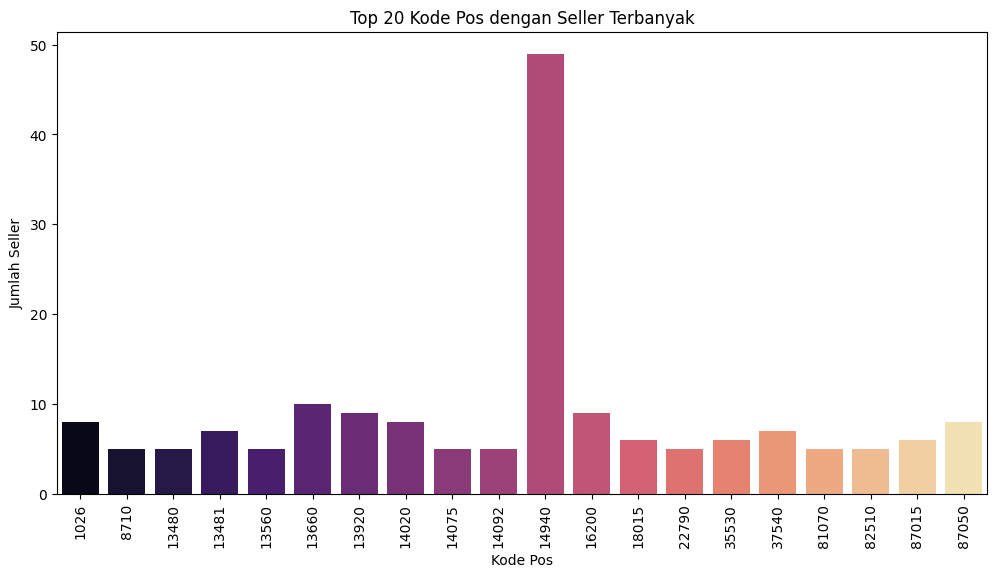

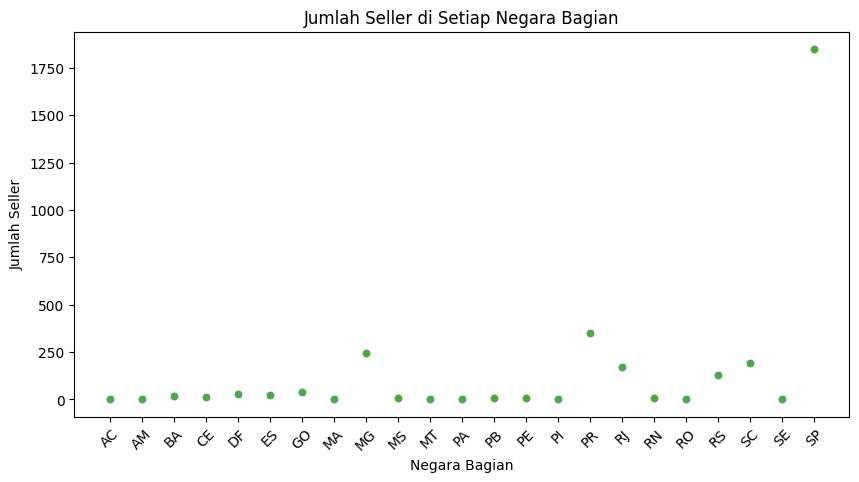

Dashboard Jumlah Seller, dengan visualisasi ini kita bisa melihat hubungan distribusi seller terhadap negara bagian yang minim seller sehingga dapat dilakukan untuk ekspansi bisnis(Jawaban Pertanyaan No 2)


In [8]:
print("\n--- Analisis Konsentrasi Seller di kota atau negara bagian tertentu ---")
# --- 1. Seller Terbanyak dan Paling Sedikit per Negara Bagian ---
print("\n--- Seller Terbanyak dan Paling Sedikit per Negara Bagian ---")
seller_count_per_city = df.groupby(["seller_state", "seller_city"])["seller_id"].nunique().reset_index()
max_sellers = seller_count_per_city.loc[seller_count_per_city.groupby("seller_state")["seller_id"].idxmax()]
min_sellers = seller_count_per_city.loc[seller_count_per_city.groupby("seller_state")["seller_id"].idxmin()]

print("Kota dengan jumlah seller terbanyak per negara bagian:")
print(max_sellers)

print("\nKota dengan jumlah seller paling sedikit per negara bagian:")
print(min_sellers)


# --- 2. Jumlah Seller per Kode Pos ---
print("\n--- Jumlah Seller per Kode Pos ---")
seller_per_zip = df.groupby("seller_zip_code_prefix")["seller_id"].nunique().reset_index()
seller_per_zip = seller_per_zip.sort_values(by="seller_id", ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=seller_per_zip, x="seller_zip_code_prefix", y="seller_id", palette="magma")
plt.xlabel("Kode Pos")
plt.ylabel("Jumlah Seller")
plt.title("Top 20 Kode Pos dengan Seller Terbanyak")
plt.xticks(rotation=90)
plt.show()

# scater plot distribusi seller berdasarkan negara bagian untuk melihat wilayah dengan potensi ekspansi
seller_per_state = df.groupby('seller_state')['seller_id'].nunique().reset_index()
seller_per_state.columns = ['seller_state', 'jumlah_seller']

plt.figure(figsize=(10, 5))
sns.scatterplot(x='seller_state', y='jumlah_seller', data=seller_per_state, color='green', alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel("Negara Bagian")
plt.ylabel("Jumlah Seller")
plt.title("Jumlah Seller di Setiap Negara Bagian")
plt.show()
print("Dashboard Jumlah Seller, dengan visualisasi ini kita bisa melihat hubungan distribusi seller terhadap negara bagian yang minim seller sehingga dapat dilakukan untuk ekspansi bisnis(Jawaban Pertanyaan No 2)")


# Insight
1.   Ada beberapa Negara Bagian (contoh sao paulo), yang memiliki jumlah seller jauh lebih banyak dibandingkan lainnya.
2.   Beberapa kode pos memiliki kepadatan seller sangat tinggi, tertinggi kodepos 14940

# Analisis Lanjutan(Clustering-Binning)

seller_category
Medium Density    475
High Density      136
Name: count, dtype: int64


C:\Users\WAWAN\AppData\Local\Temp\ipykernel_14304\3263938248.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts['seller_category'].value_counts().index,


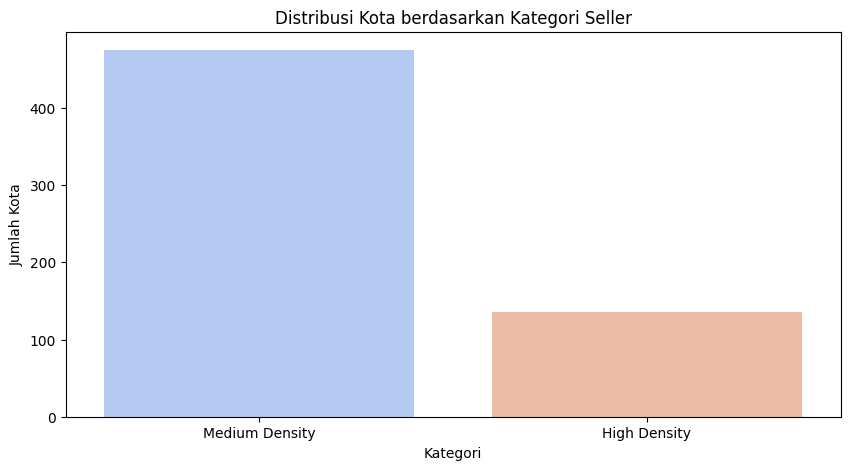

sebagian besar seller ada di kota High Density, marketplace mungkin perlu memperluas ke daerah lain.
potensi ekspansi seller ke kota-kota dengan sedikit seller.


In [8]:
# Hitung jumlah seller per kota
city_counts = df['seller_city'].value_counts().reset_index()
city_counts.columns = ['seller_city', 'seller_count']

# Tentukan kuantil untuk binning (pembagian kelompok)
low_threshold = city_counts['seller_count'].quantile(0.25)  # 25% terbawah
high_threshold = city_counts['seller_count'].quantile(0.75)  # 75% teratas

# Buat kategori binning
def categorize_city(seller_count):
    if seller_count > high_threshold:
        return 'High Density'
    elif seller_count < low_threshold:
        return 'Low Density'
    else:
        return 'Medium Density'

city_counts['seller_category'] = city_counts['seller_count'].apply(categorize_city)

# Tampilkan hasil distribusi kategori
print(city_counts['seller_category'].value_counts())

# Visualisasi hasil binning
plt.figure(figsize=(10, 5))
sns.barplot(x=city_counts['seller_category'].value_counts().index,
            y=city_counts['seller_category'].value_counts().values,
            palette='coolwarm')
plt.title('Distribusi Kota berdasarkan Kategori Seller')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Kota')
plt.show()

print("sebagian besar seller ada di kota High Density, marketplace mungkin perlu memperluas ke daerah lain.")
print("potensi ekspansi seller ke kota-kota dengan sedikit seller.")

# Conclusion
1. Kota dengan Konsentrasi Seller Tinggi
Dari analisis binning berdasarkan jumlah seller per kota, ditemukan bahwa:
*   Kategori High Density terdiri dari kota-kota besar dengan jumlah seller jauh lebih tinggi dibandingkan kota lainnya.
*   Kategori Medium Density merupakan kota dengan jumlah seller sedang.

# Implikasi Bisnis:
Kota dengan High Density bisa menjadi target optimal untuk promosi seller premium atau event marketplace.

2.   Konsentrasi Seller Berdasarkan Negara Bagian
Hasil clustering menunjukkan bahwa beberapa negara bagian memiliki dominasi seller yang tinggi, sedangkan lainnya masih minim seller.

# Implikasi Bisnis:
Jika beberapa negara bagian memiliki banyak seller tetapi permintaan rendah, perlu strategi pemasaran tambahan untuk meningkatkan penjualan.
Jika negara bagian tertentu memiliki sedikit seller tetapi populasi penduduk tinggi, maka ada peluang rekrutmen seller baru. dengan demikian distribusi seller dapat dilakukan untuk ekspansi bisnis

# Dashboard menggunakan Streamlit

2025-02-27 06:47:26.915 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 06:47:28.715 
  command:

    streamlit run C:\Users\WAWAN\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-27 06:47:28.723 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 06:47:28.723 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 06:47:28.729 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 06:47:28.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 06:47:28.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-27 06:47:

DeltaGenerator()

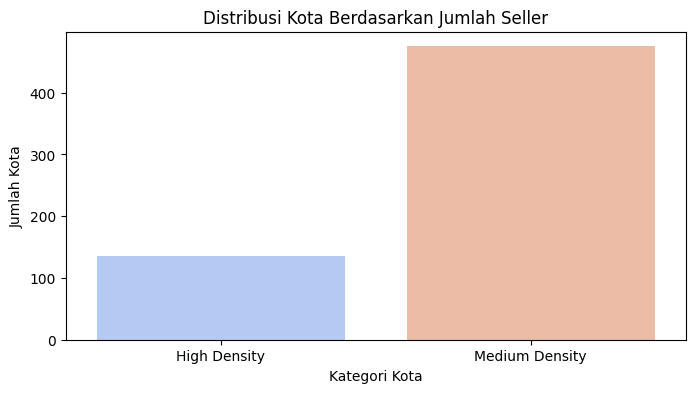

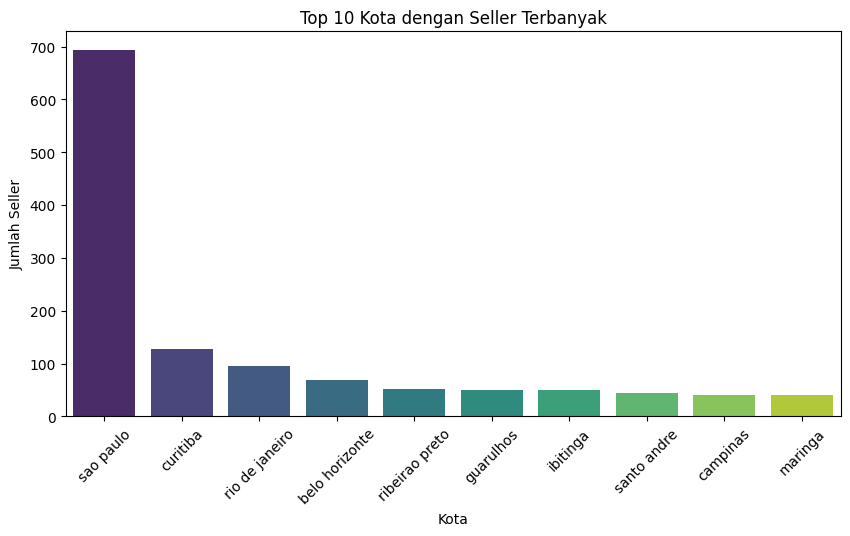

In [9]:
city_counts['seller_category'] = city_counts['seller_count'].apply(categorize_city)

# Streamlit Dashboard
st.title("Dashboard Analisis Seller Marketplace")
st.markdown("Visualisasi Data Seller Berdasarkan Kota dan Kategori Clustering")

# Pilihan filter kategori seller
selected_category = st.selectbox("Pilih Kategori Seller", ["All"] + list(city_counts['seller_category'].unique()))

# Filter data berdasarkan kategori
if selected_category != "All":
    filtered_data = city_counts[city_counts['seller_category'] == selected_category]
else:
    filtered_data = city_counts

# Tampilkan DataFrame
st.write("### Data Seller per Kota")
st.dataframe(filtered_data)

# Visualisasi Distribusi Kategori
st.write("### Distribusi Kategori Seller per Kota")
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=city_counts['seller_category'], palette='coolwarm', ax=ax)
plt.xlabel("Kategori Kota")
plt.ylabel("Jumlah Kota")
plt.title("Distribusi Kota Berdasarkan Jumlah Seller")
st.pyplot(fig)

# Bar Chart Top 10 Kota dengan Seller Terbanyak
st.write("### Top 10 Kota dengan Seller Terbanyak")
top_10_cities = city_counts.nlargest(10, 'seller_count')
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=top_10_cities['seller_city'], y=top_10_cities['seller_count'], palette="viridis", ax=ax)
plt.xticks(rotation=45)
plt.xlabel("Kota")
plt.ylabel("Jumlah Seller")
plt.title("Top 10 Kota dengan Seller Terbanyak")
st.pyplot(fig)

st.markdown("Dashboard ini membantu dalam memahami **distribusi seller** berdasarkan lokasi dan membantu dalam strategi ekspansi bisnis.")

In [17]:
%cd "Submission_Proyek Analisis_Data_EcommercePublic_Dataset2_Akas"

[WinError 2] The system cannot find the file specified: 'Submission_Proyek Analisis_Data_EcommercePublic_Dataset2_Akas'
C:\Users\WAWAN\Submission_Proyek Analisis_Data_EcommercePublic_Dataset2_Akas


In [ ]:
!streamlit run dashboard.py